In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [2]:
url = "http://books.toscrape.com/"

# This is where we do an HTTP request to get the HTML from the website
response = requests.get(url)

# And this is where we feed that HTML to the parser
soup = BeautifulSoup(response.content, "html.parser")

In [3]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

## Parsing _one_ book

In [4]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [5]:
books_html[0].find("h3").find("a")

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [6]:
books_html[0].find("h3").find("a").attrs

{'href': 'catalogue/a-light-in-the-attic_1000/index.html',
 'title': 'A Light in the Attic'}

In [7]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [12]:
books_html[0].find("div", class_="product_price")

<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>

In [20]:
books_html[0].find("p", class_="price_color")

<p class="price_color">£51.77</p>

In [21]:
books_html[0].find("p", class_="price_color").string

'£51.77'

In [25]:
book_price = float(books_html[0].find("p", class_="price_color").string[1:])
book_price

51.77

In [29]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [30]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In Python, you can use the in keyword to check if an element is contained in a list. For instance:

In [31]:
cities = [ 'paris', 'london', 'brussels' ]

if 'berlin' in cities:
    print("Berlin is available")
else:
    print("Sorry, Berlin is not available")

Sorry, Berlin is not available


In [45]:
def parse_rating(rating_classes):
    # TODO: Look at `rating_classes` and return the correct rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]
    # "One" => 1
    # "Two" => 2
    # "Three" => 3
    # "Four" => 4
    # "Five" => 5
    if 'One' in rating_classes:
        return 1
    elif 'Two' in rating_classes:
        return 2
    elif 'Three' in rating_classes:
        return 3
    elif 'Four' in rating_classes:
        return 4
    elif 'Five' in rating_classes:
        return 5
    else:
        return 0


In [46]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

## Parsing _all_ books

In [47]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

❓ Implement a loop that will iterate over books_html to populate the books_dict dictionary by reusing all the code from above.

In [49]:
for book in books_html:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

In [50]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [52]:
len(books_dict)         # You should have 3 key:value pairs

3

In [53]:
len(books_dict["Title"])# Each value should contain 20 elements from the 20 books, as many as on the web page!

20

## Loading data in Pandas

The books_dict looks good, let’s now load that data into Pandas with the pandas.DataFrame.from_dict function:

In [54]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


Looks great! Let’s generate a small plot to celebrate. The plot will show how many books there are per possible Rating:

<AxesSubplot:xlabel='Rating'>

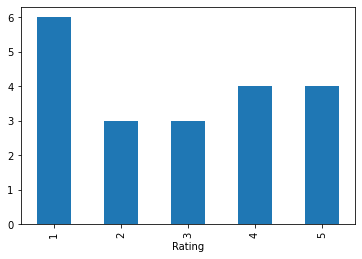

In [55]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [56]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    books_dict=books_dict,
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/lewagon/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagon/code/nikkordalis/data-challenges/02-Data-Toolkit/02-Data-Sourcing/02-Scraping
plugins: anyio-3.4.0
collecting ... collected 6 items

tests/test_books.py::TestBooks::test_books_df_columns_name PASSED        [ 16%]
tests/test_books.py::TestBooks::test_books_df_columns_size PASSED        [ 33%]
tests/test_books.py::TestBooks::test_books_dict_id_defined PASSED        [ 50%]
tests/test_books.py::TestBooks::test_first_book_price PASSED             [ 66%]
tests/test_books.py::TestBooks::test_first_book_rating PASSED            [ 83%]
tests/test_books.py::TestBooks::test_first_book_title PASSED             [100%]

============================== 6 passed in 0.56s ===============================


💯 You can commit your code:

git add tests/books.pi

## Going through all the pages of the catalogue

On books.toscrape.com, scroll down to the bottom and click on the “Next” button. Do it again. Do you see the pattern of the URL for the different pages?

In [57]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

We need another for loop! Basically a loop which will iterate from page 1 to 50 and do the scraping. While we are testing, let’s just focus on scraping from page 1 to 3:

In [58]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


Let’s replace the print with the actual code to scrape. Then run another for loop to scrape all the books from the current page. All the code is already in your notebook. Time to pick it up and glue everything together!

In [59]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 30
for page in range(1, MAX_PAGE + 1):
    print(f"Parsing page {page}...")
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a").attrs["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating)

print("Done!")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Parsing page 11...
Parsing page 12...
Parsing page 13...
Parsing page 14...
Parsing page 15...
Parsing page 16...
Parsing page 17...
Parsing page 18...
Parsing page 19...
Parsing page 20...
Parsing page 21...
Parsing page 22...
Parsing page 23...
Parsing page 24...
Parsing page 25...
Parsing page 26...
Parsing page 27...
Parsing page 28...
Parsing page 29...
Parsing page 30...
Done!


Check that you actually parsed MAX_PAGE * 20 books with:


In [60]:
len(all_books_dict["Title"])

600

Time to load the all_books_dict into a Pandas DataFrame:


In [62]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
595,The Grand Design,13.76,3
596,The Firm,45.56,3
597,The Fault in Our Stars,47.22,1
598,The False Prince (The Ascendance Trilogy #1),56.00,5
599,The Expatriates,44.58,2


Let’s see how expensive the books are:

<AxesSubplot:>

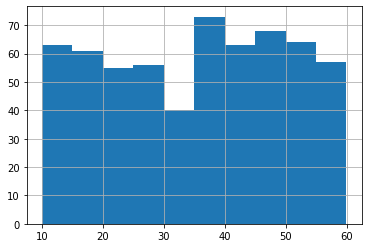

In [65]:
all_books_df["Price"].hist()

And how well rated they are:

<AxesSubplot:xlabel='Rating'>

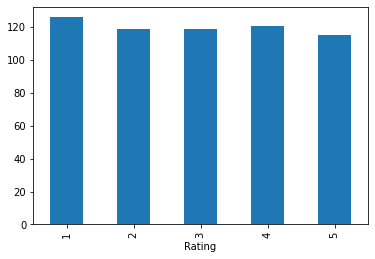

In [68]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

## Saving the data for later

For that we will use one of the writers Pandas provide. We can write a DataFrame to disk like this:

In [70]:
all_books_df.to_csv("books.csv")

If you’d rather have a regular Excel file, it’s possible!

In [71]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [72]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')

In [75]:
technologies=[{'Courses':'Spark','Duration':'30days','Discount':1000}, 
              {'Courses':'python','Fee':25000,'Courses_Fee':'Spark'}, 
              {'Fee':30000,'Duration':'35days','Duration_Discount':'10days'}]

# Convert a List of dictionaries using from_records() method.
df = pd.DataFrame.from_records(technologies)
df

,Courses,Duration,Discount,Fee,Courses_Fee,Duration_Discount
0,Spark,30days,1000.0,NaN,NaN,NaN
1,python,NaN,NaN,25000.0,Spark,NaN
2,NaN,35days,NaN,30000.0,NaN,10days


In [76]:
tv_shows = [
    {'title': 'Knight Rider', 'protagonist': 'Mikael Knight'},
    {'title': 'Breaking Bad', 'protagonist': 'Walter White/Heisenberg'},
    {'title': 'La casa de papel', 'protagonist': 'Tokyo'},
    {'title': 'Game of thrones', 'protagonist': 'Arya Stark'}
]

In [77]:
pd.DataFrame.from_records(tv_shows)

,title,protagonist
0,Knight Rider,Mikael Knight
1,Breaking Bad,Walter White/Heisenberg
2,La casa de papel,Tokyo
3,Game of thrones,Arya Stark
